In [1]:

import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential

In [2]:
# MNIST 로딩 (라벨은 필요없기 때문에 버림)
(train_x, _), (test_x, _) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
# 데이터 정규화
train_x = train_x.astype('float32') / 255.
test_x = test_x.astype('float32') / 255.

In [4]:
train_x = np.reshape(train_x, (len(train_x), 784))
test_x = np.reshape(test_x, (len(test_x), 784))

784=28*28 mnist의 size

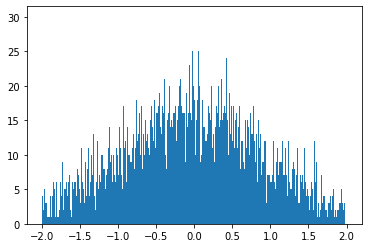

In [5]:
noise = np.random.normal(loc=0.0, scale=1.0, size=10000) 
plt.hist(noise, bins=1000, range=(-2., 2.))
plt.show()

In [6]:
# 원본데이터에 Noise 추가
noise_factor = 0.5
noisy_train_x = train_x + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=train_x.shape) 
noisy_test_x = test_x + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=test_x.shape) 

# 최대가 1, 최소가 0이 되도록 
noisy_train_x = np.clip(noisy_train_x, 0., 1.)
noisy_test_x = np.clip(noisy_test_x, 0., 1.)

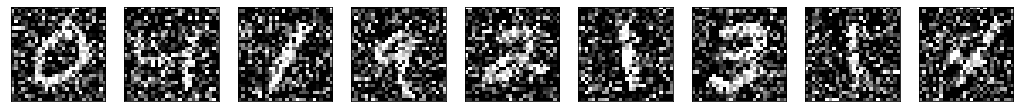

In [7]:
# Noise가 추가된 데이터 확인
n = 10
plt.figure(figsize=(20, 2))
for i in range(1,n):
    ax = plt.subplot(1, n, i)
    plt.imshow(noisy_train_x[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [8]:

# 모형 구성
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=784))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(784, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy')


# 모형 학습
model.fit(noisy_train_x, train_x, epochs=100, batch_size=256, validation_split=0.1, shuffle=True)

Epoch 1/100
211/211 [==============================] - 5s 18ms/step - loss: 0.2704 - val_loss: 0.2077
Epoch 2/100
211/211 [==============================] - 4s 17ms/step - loss: 0.1862 - val_loss: 0.1724
Epoch 3/100
211/211 [==============================] - 7s 32ms/step - loss: 0.1656 - val_loss: 0.1602
Epoch 4/100
211/211 [==============================] - 7s 33ms/step - loss: 0.1558 - val_loss: 0.1524
Epoch 5/100
211/211 [==============================] - 5s 22ms/step - loss: 0.1492 - val_loss: 0.1468
Epoch 6/100
211/211 [==============================] - 4s 19ms/step - loss: 0.1447 - val_loss: 0.1432
Epoch 7/100
211/211 [==============================] - 4s 20ms/step - loss: 0.1410 - val_loss: 0.1401
Epoch 8/100
211/211 [==============================] - 4s 19ms/step - loss: 0.1381 - val_loss: 0.1379
Epoch 9/100
211/211 [==============================] - 4s 19ms/step - loss: 0.1359 - val_loss: 0.1359
Epoch 10/100
211/211 [==============================] - 4s 19ms/step - loss: 0.133

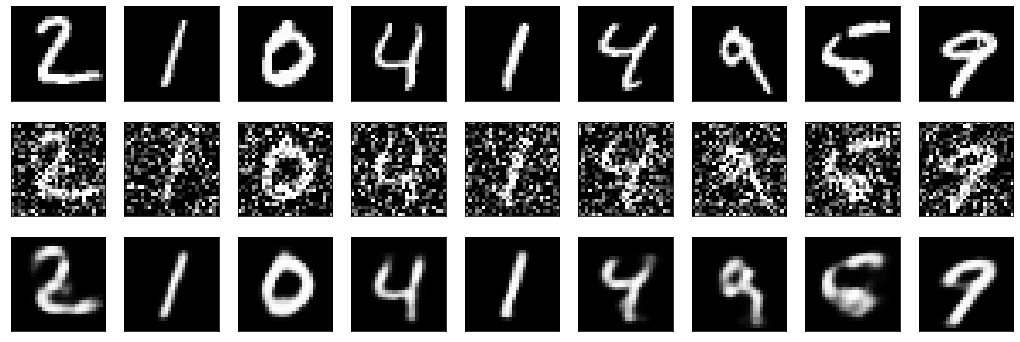

In [9]:
decoded_imgs = model.predict(noisy_test_x)

n = 10
plt.figure(figsize=(20, 6))
for i in range(1,n):
    # 원본 표시
    ax = plt.subplot(3, n, i)
    plt.imshow(test_x[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # 노이즈 첨가 된 것
    ax = plt.subplot(3, n, i + n)
    plt.imshow(noisy_test_x[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # 노이즈 제거 된 것
    ax = plt.subplot(3, n, i + 2*n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()